**Mô tả dữ liệu và bài toán:**
Dữ liệu bao gồm các triệu chứng quan trọng của những người mắc bệnh Tiểu đường (Diabetes). Dữ liệu đa dạng, bao gồm các thông tin về nhân khẩu học (Tuổi, Giới tính), cho tới các triệu chứng. Ngoài ra, dữ liệu bao gồm một trường thông tin về phân loại xem quan sát đó (bệnh nhân) có phải mắc bệnh Tiểu đường hay không. Vì vậy, với tập dữ liệu này, chúng ta sẽ tiến hành thực hiện phân tích dữ liệu EDA và phân tích Dự báo (Predictive Analysis).

**Trình tự thực hiện phân tích:**
1. Data loading and preprocessing
2. EDA
3. Predictive Analytics & Classification
4. Perfomance Evaluation and Model Comparison
5. Conclusion

**1. DATA LOADING AND PREPROCESSING**

In [2]:
## Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [5]:
## Load data
df = pd.read_csv('/diabetes_risk_prediction_dataset.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
## Handle Null & Duplicate data
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df.duplicated().sum()

269

In [8]:
## Drop dulicates
df.drop_duplicates(keep="first", inplace = True)

In [9]:
## Check data types and the encode
df.dtypes


Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [10]:
## Encode then check data types after encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col_name in df.columns:
    if df[col_name].dtype == "object":
        df[col_name] = encoder.fit_transform(df[[col_name]])
df.dtypes

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object

In [11]:
## Scale the "Age" column to make the model training more efficient
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.709103,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.730775,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.629110,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.309137,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.890761,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


**2. IMPLEMENT EXPLANATORY DATA ANALYSIS (EDA)**

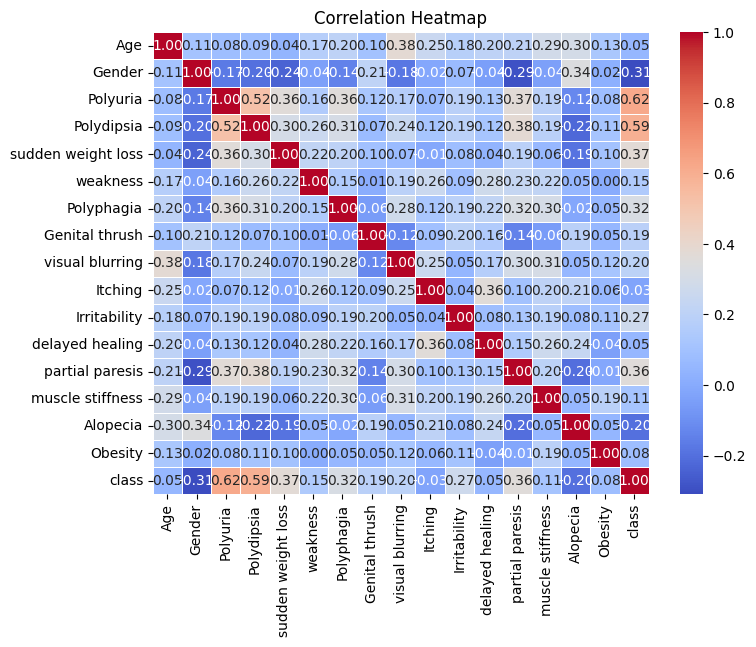

In [12]:
## Identify correlation
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Quan tâm chính khi sử dụng heatmap correlation là đánh giá một cách tổng quan các triệu chứng nào có correlation cao nhất với việc chẩn đoán bệnh nhân mắc bệnh Tiểu đường. Có thể thấy tất cả các triệu trứng đều có mối quan hệ tương quan với bệnh Tiểu đường. Đặc biệt 2 triệu chứng có tương quan cao nhất với khả năng mắc bệnh là Polyuria (Chứng đa niệu) và Polydispia (Tăng khát).

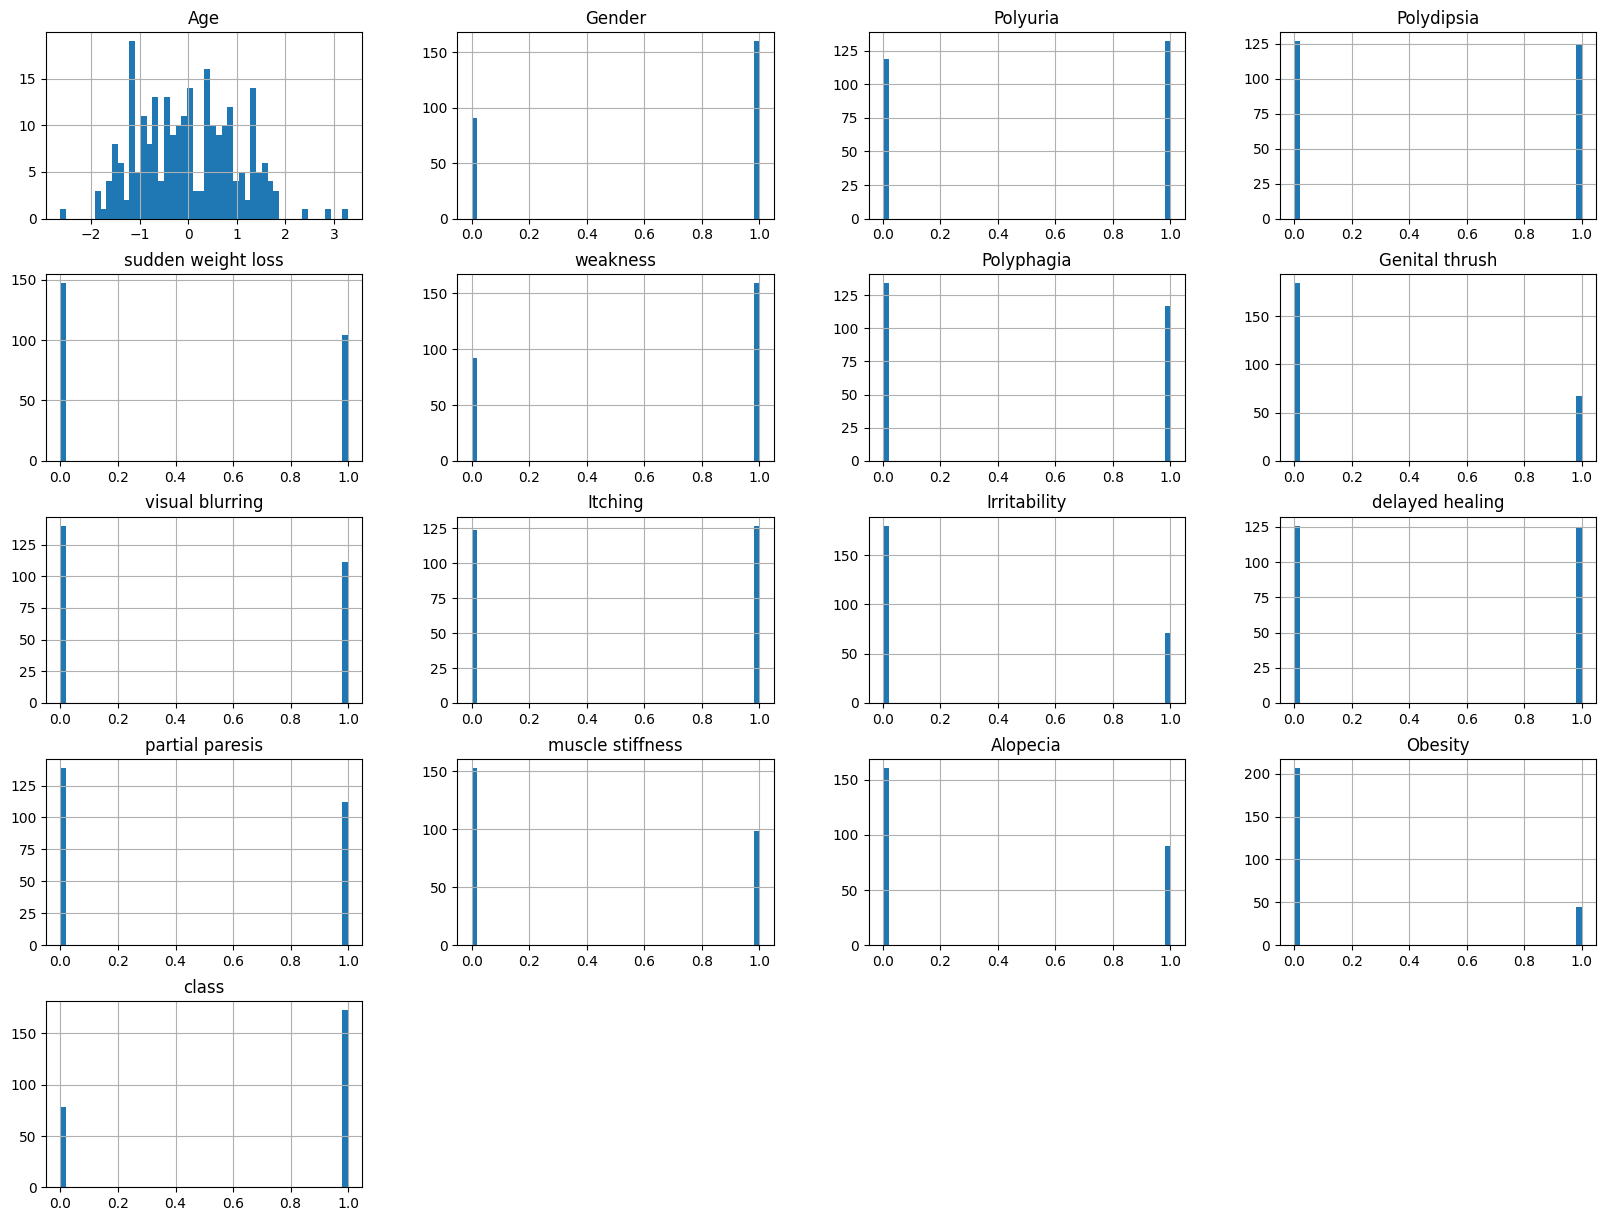

In [13]:
## Histogram to show distribution of data based on data columns
df.hist(bins=50, figsize = [20,15])
plt.show()

In [14]:
## Further test the correlation between each attribute to 'class' results
from scipy.stats import chi2_contingency

def chi2test(feature):

    # display the contingency table (observed value)
    contingency_table = pd.crosstab(df[feature],df['class'])
    contingency_table.columns = ['Diabetic','Non-diabetic']
    print('Observed value:')
    display(contingency_table)

    # perform Chi-square test
    res = chi2_contingency(contingency_table)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)
    expected_frequency = res[3]

    print('Expected frequency:')
    display(pd.DataFrame(expected_frequency, index=contingency_table.index, columns=contingency_table.columns))

    print('Test statistics: ', test_stat)
    print('Test p-value: ', pvalue)

    alpha = 0.05
    if pvalue < alpha:
        print(f'Reject null hypothesis. There is a statistically significant association between {feature} and the likelihood of diabetes in the analyzed data.')
    else:
        print(f'Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between {feature} and the likelihood of diabetes in the analyzed data.')

In [15]:
chi2test('Gender')

Observed value:


,Diabetic,Non-diabetic
Gender,,
0,11,80
1,67,93


Expected frequency:


,Diabetic,Non-diabetic
Gender,,
0,28.278884,62.721116
1,49.721116,110.278884


Test statistics:  22.6592
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Gender and the likelihood of diabetes in the analyzed data.


In [17]:
chi2test('Polyuria')

Observed value:


,Diabetic,Non-diabetic
Polyuria,,
0,73,46
1,5,127


Expected frequency:


,Diabetic,Non-diabetic
Polyuria,,
0,36.98008,82.01992
1,41.01992,90.98008


Test statistics:  94.1247
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Polyuria and the likelihood of diabetes in the analyzed data.


In [18]:
chi2test('Polydipsia')

Observed value:


,Diabetic,Non-diabetic
Polydipsia,,
0,74,53
1,4,120


Expected frequency:


,Diabetic,Non-diabetic
Polydipsia,,
0,39.466135,87.533865
1,38.533865,85.466135


Test statistics:  86.1941
Test p-value:  0.0
Reject null hypothesis. There is a statistically significant association between Polydipsia and the likelihood of diabetes in the analyzed data.


In [19]:
chi2test('Obesity')

Observed value:


,Diabetic,Non-diabetic
Obesity,,
0,68,139
1,10,34


Expected frequency:


,Diabetic,Non-diabetic
Obesity,,
0,64.326693,142.673307
1,13.673307,30.326693


Test statistics:  1.2956
Test p-value:  0.255
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Obesity and the likelihood of diabetes in the analyzed data.


In [20]:
chi2test('Itching')

Observed value:


,Diabetic,Non-diabetic
Itching,,
0,37,87
1,41,86


Expected frequency:


,Diabetic,Non-diabetic
Itching,,
0,38.533865,85.466135
1,39.466135,87.533865


Test statistics:  0.0795
Test p-value:  0.7779
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Itching and the likelihood of diabetes in the analyzed data.


**Đánh giá:**
Kiểm định chi-square được sử dụng để xác định xem có sự tương quan giữa hai biến phân loại (categorical variables) hay không.
Bằng việc sử dụng kiểm định chi_square, có thể thấy có sự liên quan chặt chẽ giữa việc mắc bệnh Tiểu đường với các triệu chứng: Polydipsia, sudden weight loss, weakness, Polyphagia, Genital thrush, visual blurring, Irritability, partial paresis, muscle stiffnes, Alopecia. Trong khi không có đủ evidence để nói rằng có mối tương quan giữa bệnh Tiểu đường và Obesity, Itching và delayed healing.


**3. PREDICTIVE ANALYSIS**

In [21]:
## Train-Test split
from sklearn.model_selection import train_test_split
X = df.drop("class",axis = 1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42) # Keeping 70% train data and 30% test data
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
220,-0.869090,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0.330809,1,1,1,1,1,1,0,1,0,1,0,1,0,1,0
128,-1.349049,1,0,1,0,1,1,1,0,1,1,0,0,0,1,0
143,0.330809,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0
148,-0.389130,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as mt

In [27]:
# Initialize models
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
ab = AdaBoostClassifier()
svc = SVC()
knn = KNeighborsClassifier()

In [29]:
## LinearRegression
lr.fit(X_train,y_train)
mt.accuracy_score(y_train, lr.predict(X_train))

0.9142857142857143

In [30]:
mt.accuracy_score(y_test, lr.predict(X_test))


0.8421052631578947

In [35]:
print(mt.classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74        27
           1       0.82      0.96      0.89        49

    accuracy                           0.84        76
   macro avg       0.86      0.79      0.81        76
weighted avg       0.85      0.84      0.83        76



In [31]:
## Decision Tree
dtc.fit(X_train,y_train)
mt.accuracy_score(y_train, dtc.predict(X_train))

1.0

In [32]:
mt.accuracy_score(y_test, dtc.predict(X_test))

0.8552631578947368

In [36]:
print(mt.classification_report(y_test, dtc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.88      0.90      0.89        49

    accuracy                           0.86        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.85      0.86      0.85        76



In [33]:
## Random Forest Classifier
rfc.fit(X_train,y_train)
mt.accuracy_score(y_train, rfc.predict(X_train))


1.0

In [34]:
mt.accuracy_score(y_test, rfc.predict(X_test))

0.9342105263157895

In [37]:
print(mt.classification_report(y_test, rfc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.94      0.96      0.95        49

    accuracy                           0.93        76
   macro avg       0.93      0.92      0.93        76
weighted avg       0.93      0.93      0.93        76



In [38]:
## ADA Boost Classifier
ab.fit(X_train,y_train)
mt.accuracy_score(y_train, ab.predict(X_train))

0.9428571428571428

In [39]:
mt.accuracy_score(y_test, ab.predict(X_test))

0.8289473684210527

In [40]:
print(mt.classification_report(y_test, ab.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.67      0.73        27
           1       0.83      0.92      0.87        49

    accuracy                           0.83        76
   macro avg       0.83      0.79      0.80        76
weighted avg       0.83      0.83      0.82        76



In [41]:
## Support Vector Classifier (SVC)
svc.fit(X_train,y_train)
mt.accuracy_score(y_train, svc.predict(X_train))


0.9714285714285714

In [42]:
mt.accuracy_score(y_test, svc.predict(X_test))

0.9342105263157895

In [43]:
print(mt.classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.92      0.98      0.95        49

    accuracy                           0.93        76
   macro avg       0.94      0.92      0.93        76
weighted avg       0.94      0.93      0.93        76



In [44]:
## K Nearest Classifier
knn.fit(X_train,y_train)
mt.accuracy_score(y_train, knn.predict(X_train))

0.9142857142857143

In [45]:
mt.accuracy_score(y_test, knn.predict(X_test))

0.9210526315789473

In [46]:
print(mt.classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.92      0.98      0.95        49

    accuracy                           0.93        76
   macro avg       0.94      0.92      0.93        76
weighted avg       0.94      0.93      0.93        76



**4. Perfomance Evaluation and Model Comparison**

In [61]:
precisions = [mt.precision_score(y_test, lr.predict(X_test)),
              mt.precision_score(y_test, dtc.predict(X_test)),
              mt.precision_score(y_test, rfc.predict(X_test)),
              mt.precision_score(y_test, ab.predict(X_test)),
              mt.precision_score(y_test, svc.predict(X_test)),
              mt.precision_score(y_test, knn.predict(X_test))]

recalls = [mt.recall_score(y_test, lr.predict(X_test)),
           mt.recall_score(y_test, dtc.predict(X_test)),
           mt.recall_score(y_test, rfc.predict(X_test)),
           mt.recall_score(y_test, ab.predict(X_test)),
           mt.recall_score(y_test, svc.predict(X_test)),
           mt.recall_score(y_test, knn.predict(X_test))]

f1_scores = [mt.f1_score(y_test, lr.predict(X_test)),
             mt.recall_score(y_test, dtc.predict(X_test)),
             mt.recall_score(y_test, rfc.predict(X_test)),
             mt.recall_score(y_test, ab.predict(X_test)),
             mt.recall_score(y_test, svc.predict(X_test)),
             mt.recall_score(y_test, knn.predict(X_test))]
methods = ['Linear Regression', 'Decision Tree', 'Random Tree', 'ADA Boost','SVC','KNN']


In [63]:
# Creating a DataFrame

comparison_data = {'methods': methods, 'precisions': precisions, 'f1_scores': f1_scores, 'recalls': recalls}
comparison_data = pd.DataFrame(comparison_data)

# Displaying the DataFrame
print(comparison_data)

             methods  precisions  f1_scores   recalls
0  Linear Regression    0.824561   0.886792  0.959184
1      Decision Tree    0.880000   0.897959  0.897959
2        Random Tree    0.940000   0.959184  0.959184
3          ADA Boost    0.833333   0.918367  0.918367
4                SVC    0.923077   0.979592  0.979592
5                KNN    0.977778   0.897959  0.897959


**5. Conclusion**
Từ bảng so sánh performance của các mô hình ở trên, có thể thấy ba mô hình hoạt động hiệu quả nhất là Random Tree, SVC và KNN. Vì bài toán là chẩn đoán y tế, việc quan trọng trong mô hình dự đoán không chỉ là dự đoán đúng các trường hợp Positive, mà đặc biệt phải hạn chế nhiều nhất các trường hợp chuẩn đoán sai False Negative (người bệnh mắc bênh Tiểu đường nhưng mô hình dự đoán là không mắc bệnh Tiểu đường) vì có thể gây ra hậu quả nghiêm trọng. Do đó, chỉ số Recalls rất quan trọng. Nếu xét trong ba mô hình hiệu quả nhất ở trên, có thể thấy SVC là mô hình phù hợp nhất trong ba mô hình, với tỷ lệ recalls cao nhất.